#빅데이터분석기사 실기 기출문제 8회 (예문사, 빅데이터분석기사 실기 한권완성)

In [2]:
!git clone https://github.com/desunny/AnalyticsKnight/

Cloning into 'AnalyticsKnight'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 141 (delta 35), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (141/141), 8.40 MiB | 4.94 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [4]:
data_path = "/content/AnalyticsKnight/datasets/Part5/ex8/"
#data_path = "/content/drive/MyDrive/01.Lecture/05.빅분기/02.빅분기실기/8회 기출풀이/datas/"

# 1유형

##1) 커피 원두 소비량 문제
  

다음은 나라별 커피 원두 소비량에 대한 데이터다. 각 나라의 커피 원두 소비량과 대륙명 등을 포함한 데이터를 이용하여 아래 문제에 답하시오.

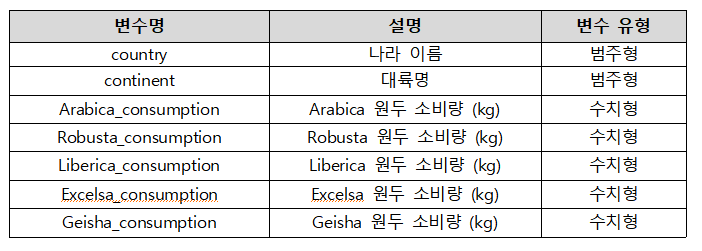

(1) 대륙별 평균 Arabica 원두 소비량이 가장 많은 대륙을 구하시오.

(2) 1)에서 구한 대륙에서 다섯 번째로 Arabica 원두 소비량이 많은 나라를 구하시오.

(3) 2)에 해당하는 나라의 Arabica 원두 소비량을 정수로 작성하시오.

#### 711-01 데이터로드

In [ ]:
import pandas as pd

# 데이터 로드
data_file = data_path + "08.01.01.coffee_consumption.csv"
df_coffee = pd.read_csv(data_file)

#### 711-02 대륙별 평균 Arabica 원두 소비량이 가장 많은 대륙 구하기

In [ ]:
# 1) 대륙별 평균 Arabica 원두 소비량이 가장 많은 대륙 구하기
continent_avg_arabica = df_coffee.groupby('continent')['Arabica_consumption'].mean().sort_values(ascending=False)
top_continent = continent_avg_arabica.idxmax()

print(top_continent)

Oceania


#### 711-03 해당 대륙에서 다섯 번째로 Arabica 원두 소비량이 많은 나라 구하기

In [ ]:
# 2) 해당 대륙에서 다섯 번째로 Arabica 원두 소비량이 많은 나라 구하기
top_continent_df = df_coffee[df_coffee['continent'] == top_continent].sort_values(by='Arabica_consumption', ascending=False)
fifth_highest_country = top_continent_df.iloc[4]['country']

print(fifth_highest_country)

Namibia


#### 711-04 해당 나라의 Arabica 원두 소비량을 정수로 작성

In [ ]:
# 3) 해당 나라의 Arabica 원두 소비량을 정수로 작성
fifth_highest_arabica_consumption = int(top_continent_df.iloc[4]['Arabica_consumption'])

# 결과 출력
print(fifth_highest_arabica_consumption)


463


## 2) 자동차 판매량 문제

다음은 각 나라별 자동차 판매량에 대한 데이터다. SUV 판매 비율이 세 번째로 높은 나라의 세단 판매량과 세단 판매량이 네 번째로 높은 나라의 SUV 판매량을 합한 값을 구하시오.

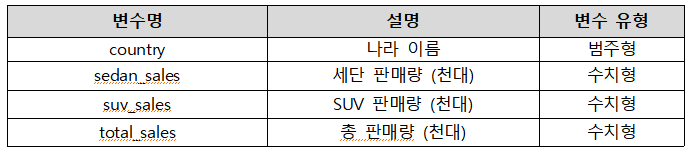

#### 712-01 데이터로드

In [ ]:
import pandas as pd

# 데이터 로드
data_file = data_path + "08.01.02.Auto_Sales.csv"
df = pd.read_csv(data_file)
df.head()

,country,sedan_sales,suv_sales,total_sales
0,USA,309,735,1044
1,Germany,442,356,798
2,Japan,590,794,1384
3,South Korea,785,873,1658
4,China,567,838,1405


#### 712-02 SUV 판매 비율 계산  (SUV 판매량 / 총 판매량)

In [ ]:
# SUV 판매 비율 계산 (SUV 판매량 / 총 판매량)
df['suv_ratio'] = df['suv_sales'] / df['total_sales']

print(df.head())

       country  sedan_sales  suv_sales  total_sales  suv_ratio
0          USA          309        735         1044   0.704023
1      Germany          442        356          798   0.446115
2        Japan          590        794         1384   0.573699
3  South Korea          785        873         1658   0.526538
4        China          567        838         1405   0.596441


 #### 712-03 세 번째 높은 SUV 판매 비율 나라

In [ ]:
# 세 번째로 높은 SUV 판매 비율을 가진 나라 찾기
df_sorted_by_suv_ratio = df.sort_values(by='suv_ratio', ascending=False)
third_suv = df_sorted_by_suv_ratio.iloc[2]  # 세 번째 나라
#iloc: 정렬된 순서에 따른 정수 위치를 사용해 데이터 선택
#loc: 인덱스 번호 또는 라벨 이름으로 데이터 선택

#### 712-04 세 번째 높은 SUV 판매 비율을 가진 나라의 세단 판매량

In [ ]:

# 세 번째로 높은 SUV 판매 비율을 가진 나라의 세단 판매량
third_suv_sedan = third_suv['sedan_sales']
print(f"세 번째 높은 SUV 판매 비율을 가진 나라의 세단 판매량: {third_suv_sedan}")



세 번째 높은 SUV 판매 비율을 가진 나라의 세단 판매량: 435


#### 712-05 네 번째 세단 판매량이 높은 나라

In [ ]:
# 세단 판매량으로 정렬하여 네 번째로 세단 판매량이 높은 나라 찾기
df_sorted_by_sedan_sales = df.sort_values(by='sedan_sales', ascending=False)
fourth_sedan = df_sorted_by_sedan_sales.iloc[3]  # 네 번째 나라
# 해당 나라의 SUV 판매량 계산
fourth_sedan_suv = fourth_sedan['suv_sales']
print(f"네 번째 나라의 SUV 판매량: {fourth_sedan_suv}")


네 번째 나라의 SUV 판매량: 693


#### 712-06 두 판래량의 합 구하기

In [ ]:
# 두 판매량의 합
total_sales_sum = third_suv_sedan + fourth_sedan_suv
# 결과 출력
print(total_sales_sum)

1128


## 3) 설비 성능 지표 문제

다음 데이터는 A 화학 공장의 생산 공정 중 원재료에 포함된 탄소 농도(Co)에 따른 설비의 성능 지표(Nmch)를 나타내는 값이다. 이 데이터를 이용하여 질문에 답하시오.

*   Co: 원재료에 포함된 탄소 농도
*   Nmch: 설비의 성능 지표 (예: 기계의 작업량, 에너지 소비량, 기계의 효율성 등)

(1) Co와 Nmch에 대해 최대-최소 정규화를 수행한 후, 각 칼럼의 표준 편차를 구하고 두 표준편차의 차이를 구하시오.

(2) 두 변수 중 변동성이 큰 변수는 무엇인지 답하시오.

#### 713-01 데이터 로드

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드
data_file = data_path + "08.01.03.Co_Nmch.csv"
df = pd.read_csv(data_file)

print(df.head())

          Co       Nmch
0  42.472407  11.571459
1  77.042858  41.820521
2  63.919637  25.717799
3  55.919509  35.428535
4  29.361118  55.378324


#### 713-02 정규화, 표준편차

In [ ]:
# 1. 최대-최소 정규화 수행
scaler = MinMaxScaler()
df[['Co_normalized', 'Nmch_normalized']] = scaler.fit_transform(df[['Co', 'Nmch']])

# 2. 표준 편차 계산
X = df['Co_normalized'].std()  # Co의 정규화된 값의 표준 편차
Y = df['Nmch_normalized'].std()  # Nmch의 정규화된 값의 표준 편차

print( X - Y )

0.003647539776943487


#### 713-03 변동성이 큰 변수 확인

In [ ]:
# 2. 변동성이 큰 변수 확인
if X > Y:
    larger_variance_variable = 'Co'
else:
    larger_variance_variable = 'Nmch'

# 결과 출력
print(f"변동성이 큰 변수: {larger_variance_variable}")

변동성이 큰 변수: Co


# 2유형

1) 서울시에서 지하철역의 운영 효율성을 높이기 위해 각 역의 이용객 수를 예측하는 모델을 구축하려고 한다. 주어진 데이터를 바탕으로 지하철역의 이용객 수(num_people)를 예측하는 머신러닝 모델을 만들어, 이를 바탕으로 각 지하철역의 자원 배분 및 운영 계획을 수립할 예정이다. 주어진 훈련 데이터 세트를 활용하여 지하철역 이용객 수 예측 모델을 구축한 후, 테스트 데이터를 대상으로 예측 결과를 CSV 파일로 제출하시오. (채점기준 - RMSE)


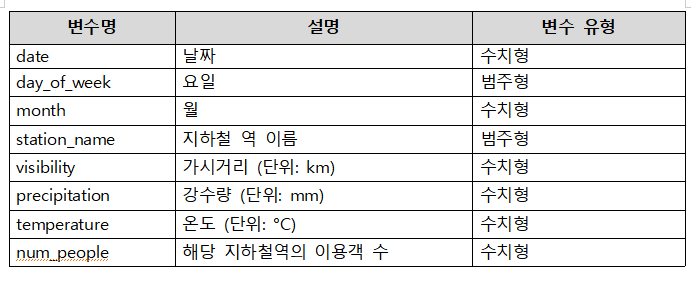

#### 721-01 데이터로드

In [ ]:
# 출력을 원하실 경우 print() 함수 활용
# 예시) print(df.head())

# getcwd(), chdir() 등 작업 폴더 설정 불필요
# 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

# 데이터 파일 읽기 예제
import pandas as pd

train_file = data_path + '08.02.01.subway_train.csv'
test_x_file = data_path + '08.02.01.subway_test_x.csv'

train_df = pd.read_csv(train_file)
test_x_df = pd.read_csv(test_x_file)

# 사용자 코딩


# 답안 제출 참고
# 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
# pd.DataFrame({'index': X_test.index, 'y_pred': pred}).to_csv('003000000.csv', index=False)

#### 721-02 라이브러리 임포트

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

#### 721-03 데이터 정보확인

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           900 non-null    object 
 1   day_of_week    900 non-null    object 
 2   month          900 non-null    int64  
 3   station_name   895 non-null    object 
 4   visibility     892 non-null    float64
 5   precipitation  900 non-null    float64
 6   temperature    900 non-null    float64
 7   num_people     900 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 56.4+ KB


In [ ]:
train_df.describe()

,month,visibility,precipitation,temperature,num_people
count,900.000000,892.000000,900.000000,900.000000,900.000000
mean,6.122222,9.996512,9.339334,15.070645,12556.747778
std,3.314202,2.039593,6.721645,9.914046,1827.065461
min,1.000000,3.223144,0.008814,-17.394377,7261.000000
25%,3.000000,8.627064,4.002631,8.513877,11314.500000
50%,6.000000,10.043633,8.004760,14.994892,12558.000000
75%,9.000000,11.427402,13.151872,21.865623,13766.000000
max,12.000000,16.509295,37.604911,51.577018,18186.000000


#### 721-04 결측치 처리

In [ ]:
# 결측치 처리
# visibility는 평균값으로 채우고, station_name은 최빈값으로 채우기
train_df['visibility'] = train_df['visibility'].fillna(train_df['visibility'].mean())
train_df['station_name'] = train_df['station_name'].fillna(train_df['station_name'].mode()[0])

#### 721-05 라벨 인코딩

In [ ]:
# Label Encoding for categorical variables
le_day_of_week = LabelEncoder()
le_station_name = LabelEncoder()
train_df['day_of_week_encoded'] = le_day_of_week.fit_transform(train_df['day_of_week'])
train_df['station_name_encoded'] = le_station_name.fit_transform(train_df['station_name'])

#### 721-06 독립변수, 종속변수 설정

In [ ]:
# 독립변수(X)와 종속변수(y) 설정
X = train_df[['visibility', 'precipitation', 'temperature', 'month', 'day_of_week_encoded', 'station_name_encoded']]  # 라벨 인코딩된 변수를 추가
y = train_df['num_people']

#### 721-07 학습용, 테스트용 데이터 분리

In [ ]:
# 학습용 데이터와 테스트용 데이터로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


#### 721-08 선형회귀모델 학습 및 평가

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 1. Linear Regression 모델
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_val)
r2_linear = r2_score(y_val, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_val, y_pred_linear))


print(f"Linear Regression R²: {r2_linear:.4f}, RMSE: {rmse_linear:.4f}")

Linear Regression R²: 0.7743, RMSE: 895.0050


#### 721-09 랜덤포레스트 학습 및 평가

In [ ]:
# 2. Random Forest 모델
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_val)
r2_rf = r2_score(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))

print(f"Random Forest R²: {r2_rf:.4f}, RMSE: {rmse_rf:.4f}")

Random Forest R²: 0.8249, RMSE: 788.3335


#### 721-10 XGBoost 학습 및 평가

In [ ]:
# 3. XGBoost 모델
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
r2_xgb = r2_score(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
print(f"XGBoost R²: {r2_xgb:.4f}, RMSE: {rmse_xgb:.4f}")

XGBoost R²: 0.8028, RMSE: 836.6270


#### 721-11 모델별 성능 비교 출력

In [ ]:
# 모델별 성능 비교 출력
print(f"Linear Regression R²: {r2_linear:.4f}, RMSE: {rmse_linear:.4f}")
print(f"Random Forest R²: {r2_rf:.4f}, RMSE: {rmse_rf:.4f}")
print(f"XGBoost R²: {r2_xgb:.4f}, RMSE: {rmse_xgb:.4f}")

Linear Regression R²: 0.7743, RMSE: 895.0050
Random Forest R²: 0.8249, RMSE: 788.3335
XGBoost R²: 0.8028, RMSE: 836.6270


#### 721-12 답안제출

In [ ]:
# 답안 제출
#테스트 데이터 라벨 인코딩
le_day_of_week = LabelEncoder()
le_station_name = LabelEncoder()
test_x_df['day_of_week_encoded'] = le_day_of_week.fit_transform(test_x_df['day_of_week'])
test_x_df['station_name_encoded'] = le_station_name.fit_transform(test_x_df['station_name'])

#제출용 테스트 데이터
text_x = test_x_df[['visibility', 'precipitation', 'temperature', 'month', 'day_of_week_encoded', 'station_name_encoded']]

y_pred = random_forest_model.predict(text_x)

# 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
pd.DataFrame({'index': test_x_df.index, 'y_pred': y_pred}).to_csv('003000000.csv', index=False)

#### 721-13 답안 채점 방법

In [ ]:
data_file = data_path + '08.02.01.subway_test_y.csv'

test_y_df = pd.read_csv(data_file)
# print(test_y_df.info())
# print(test_x_df.info())

y_r2 = r2_score(test_y_df, y_pred)
y_rmse = mean_squared_error(test_y_df, y_pred)

print(f"제출 답안의 R²: {r2_xgb:.4f}, RMSE: {rmse_xgb:.4f}")


제출 답안의 R²: 0.8028, RMSE: 836.6270


# 3유형

## 1) 고객 이탈지수를 종속변수로 하여, 로지스틱 회귀를 수행하고, 관련된 분석을 진행하시오.

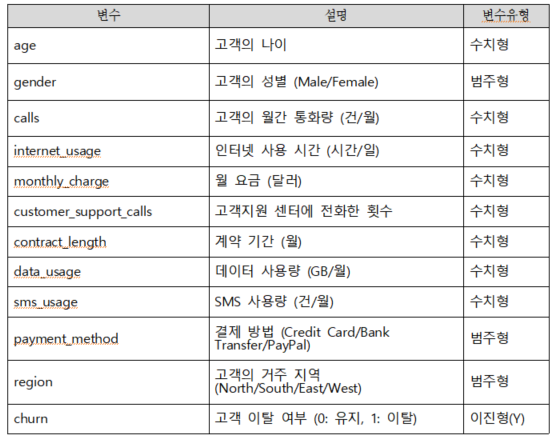

(1)주어진 데이터에서 상수항을 추가한 로지스틱 회귀를 수행하고, 유의하지 않은 변수의 개수를 구하시오.

#### 731-01 데이터 로드

In [ ]:
import pandas as pd

# 데이터 로드
data_file = data_path + "08.03.01.customer_churn.csv"
df = pd.read_csv(data_file)

#### 731-02 로지스틱 회귀 수행

In [ ]:
import statsmodels.api as sm

# 독립변수(X)와 종속변수(y) 설정
X = df.drop('churn', axis=1)  # 독립변수
y = df['churn']  # 종속변수

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 학습
model = sm.Logit(y, X).fit()

# 결과 출력
model_summary = model.summary()
p_values = model.pvalues

Optimization terminated successfully.
         Current function value: 0.090695
         Iterations 11


#### 731-03 유의하지 않은 변수 갯수 구하기

In [ ]:

# 유의하지 않은 변수(p-value > 0.05)의 개수
non_significant_vars = p_values[p_values > 0.05].count()

print(model_summary)
print(f"유의하지 않은 변수의 개수: {non_significant_vars}")

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                  200
Model:                          Logit   Df Residuals:                      185
Method:                           MLE   Df Model:                           14
Date:                Tue, 18 Feb 2025   Pseudo R-squ.:                  0.6747
Time:                        07:41:05   Log-Likelihood:                -18.139
converged:                       True   LL-Null:                       -55.754
Covariance Type:            nonrobust   LLR p-value:                 2.148e-10
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -48.4932     13.372     -3.626      0.000     -74.702     -22.285
age                            0.3010      0.086      3.490      0.000       0.132 

(2)유의미한 변수만을 독립변수로 하여, 로지스틱 회귀를 다시 수행하시오. 이때 회귀계수의 평균을 구하시오.

#### 731-04 유의미한 변수 확인하기

In [ ]:
significant_vars = p_values[p_values <= 0.05]

significant_vars

,0
const,0.000287
age,0.000484
calls,0.002091
monthly_charge,0.000821


#### 731-05 유의미한 변수로 로지스틱 회귀 수행

In [ ]:
# 유의미한 변수만을 사용하여 로지스틱 회귀 수행 (age, monthly_charge)
X_significant = df[['age', 'calls', 'monthly_charge']]  # 유의미한 변수만 선택
X_significant = sm.add_constant(X_significant)  # 상수항 추가

# 로지스틱 회귀 모델 재학습
model_significant = sm.Logit(y, X_significant).fit()

# 회귀계수의 평균 계산
coeff_mean = model_significant.params.mean()

print(model_significant.summary())
print(f"회귀계수의 평균: {coeff_mean}")

Optimization terminated successfully.
         Current function value: 0.128481
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Feb 2025   Pseudo R-squ.:                  0.5391
Time:                        07:41:18   Log-Likelihood:                -25.696
converged:                       True   LL-Null:                       -55.754
Covariance Type:            nonrobust   LLR p-value:                 5.554e-13
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -40.2967      9.192     -4.384      0.000     -58.312     -22.281
age             

(3) 위 (1), (2)에서 얻은 회귀식을 바탕으로 calls 변수가 5 증가할 때 오즈비는 몇 배 증가하는지 구하시오.

#### 731-06 오즈비 구하기

In [ ]:
# 회귀식에서 calls 변수가 5 증가할 때 오즈비 구하기 (5증가할 때 churn 이탈율은 4.7배 증가)
# 로지스틱 회귀 모델을 다시 수행하여 calls 변수의 계수를 확인

# calls 변수의 회귀계수 확인
calls_coef = model_significant.params['calls']

# calls 변수가 5 증가할 때 오즈비 계산 (exp(β_calls * 5))
import numpy as np
odds_ratio = np.exp(calls_coef * 5)

print(f"calls 변수의 회귀계수: {calls_coef}")
print(f"calls 변수가 5 증가할 때 오즈비: {odds_ratio}")


Optimization terminated successfully.
         Current function value: 0.118292
         Iterations 10
calls 변수의 회귀계수: 0.3111633928376774
calls 변수가 5 증가할 때 오즈비: 4.7389565018803435


##2) PIQ 문제

다음은 PIQ(Performance IQ)를 예측하기 위한 다양한 독립변수들을 포함한 데이터셋이다. 이 데이터를 바탕으로 다중선형회귀 분석을 수행하여 다음 질문에 답하시오.

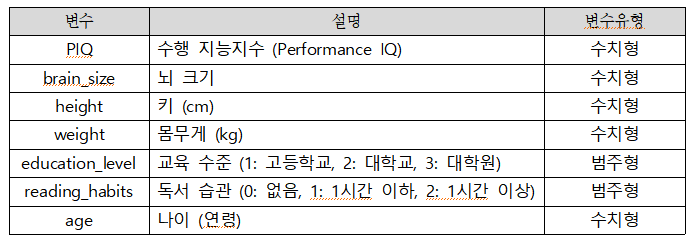

(1)다중선형회귀분석을 적용하여 각 독립변수의 회귀계수를 구하고, 가장 유의미한 변수의 회귀계수를 쓰시오.

#### 732-01 데이터 로드

In [5]:
import pandas as pd

data_file = data_path + '08.03.02.piq.csv'
df = pd.read_csv(data_file)
df.head()

,PIQ,brain_size,height,weight,education_level,reading_habits,age
0,57.961847,88.126147,170.119327,63.845108,1,1,20
1,45.089425,90.820963,178.100418,77.469348,2,0,46
2,40.674431,89.420298,166.936399,56.373382,1,1,46
3,40.630755,74.254530,159.494647,90.886654,2,1,56
4,56.691322,96.856613,178.773642,80.976851,2,2,55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PIQ              300 non-null    float64
 1   brain_size       300 non-null    float64
 2   height           300 non-null    float64
 3   weight           300 non-null    float64
 4   education_level  300 non-null    int64  
 5   reading_habits   300 non-null    int64  
 6   age              300 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 16.5 KB


In [ ]:
df.describe()

,PIQ,brain_size,height,weight,education_level,reading_habits,age
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000
mean,55.461140,90.059777,169.710813,65.717473,1.966667,0.96000,38.573333
std,11.344916,10.244488,10.296436,11.882670,0.804807,0.82907,12.201950
min,24.776443,60.690384,140.100666,35.548988,1.000000,0.00000,18.000000
25%,48.053989,83.409396,162.365995,57.499179,1.000000,0.00000,28.000000
50%,55.198947,89.468587,169.930736,65.828290,2.000000,1.00000,38.500000
75%,62.403207,96.805014,177.064026,73.188232,3.000000,2.00000,48.250000
max,90.917610,124.343464,198.762201,97.793175,3.000000,2.00000,59.000000


#### 732-02 다중회귀 분석 수행

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# 독립변수(X)와 종속변수(y) 분리
X = df[['brain_size', 'height', 'weight', 'education_level', 'reading_habits', 'age']]
y = df['PIQ']

# 학습용 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 다중선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### 732-03 유의미한 변수 구하기

In [7]:
# 각 독립변수의 회귀계수
coefficients = model.coef_

# # 가장 유의미한 변수
most_significant_variable = X.columns[np.argmax(np.abs(coefficients))]
most_significant_coefficient = coefficients[np.argmax(np.abs(coefficients))]
print(most_significant_variable)
print(most_significant_coefficient)

education_level
9.875831165248849


In [ ]:
#제출
print(most_significant_coefficient)

9.875831165248849


(2)Test Data를 이용하여 결정계수 (R²) 값을 구하시오.

#### 732-04 결정계수 구하기

In [8]:
# 결정계수 (R² 값)

y_pred = model.predict(X_test)

r2_value = r2_score(y_test, y_pred)

print(r2_value)


0.8485178293850396


In [ ]:
#제출
print(r2_value)

0.8485178293850396


(3)아래와 같은 참가자 데이터가 주어졌을 때, 다중선형회귀식을 사용하여 각 참가자의 PIQ를 예측하시오.
   * brain_size = 150, height = 190, weight = 90, education_level = 3, reading_habits = 2, age = 15

#### 732-06 새로운 참가자의 PIQ 예측

In [ ]:
# 새로운 참가자의 PIQ 예측
# 새로운 참가자 데이터를 DataFrame으로 생성하여 열 이름을 포함시킴
real_data = pd.DataFrame({
    'brain_size': [150],
    'height': [190],
    'weight': [90],
    'education_level': [3],
    'reading_habits': [2],
    'age': [15]
})

# 새로운 참가자에 대해 PIQ 예측
pred_piq = model.predict(real_data)[0]


In [ ]:
#제출

print(pred_piq)

85.58794635780947
